# Homework 4

Written by Adam Ten Hoeve  
COMP 4448: Data Science Tools 2

In [58]:
# Load necesary libraries
import numpy as np
import pandas as pd

from sklearn.metrics import euclidean_distances, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

a)	Read the data provided on canvas into Python as follows: 
 
Print the first 5 rows of each dataset to inspect the nature of data


In [2]:
delivery_train = pd.read_csv("delivery_time_train_data.csv")
delivery_test = pd.read_csv("delivery_time_test_data.csv")
student_train = pd.read_csv("student_train_data.csv")
student_test = pd.read_csv("student_test_data.csv")

In [3]:
delivery_train.head()

,Miles,Deliveries,Time
0,100,4,9.3
1,50,3,4.8
2,100,4,8.9
3,100,2,6.5
4,50,2,4.2


In [4]:
delivery_test.head()

,Miles,Deliveries,Time
0,50,3,4.6
1,65,2,5.5
2,80,1,6.3
3,70,1,6.2
4,70,5,8.5


In [5]:
student_train.head()

,GPA,Age,Dropped
0,3.78,21,0
1,2.38,27,0
2,3.05,21,1
3,2.19,28,1
4,3.22,23,0


In [6]:
student_test.head()

,GPA,Age,Dropped
0,2.49,26,1
1,2.67,29,0
2,2.86,29,1
3,2.21,26,0
4,2.91,20,1


b)	Split the data into training and test set as follows:
 
Print the shape of input and output data for the training and test sets 


In [7]:
X_delivery_train = delivery_train[["Miles", "Deliveries"]]
y_delivery_train = delivery_train[["Time"]]

X_delivery_test = delivery_test[["Miles", "Deliveries"]]
y_delivery_test = delivery_test[["Time"]]

X_student_train = student_train[["GPA", "Age"]]
y_student_train = student_train[["Dropped"]]

X_student_test = student_test[["GPA", "Age"]]
y_student_test = student_test[["Dropped"]]

In [8]:
# Print the shape of the X and y for each set
# Training delivery set
print("Shape of training delivery input:", X_delivery_train.shape)
print("Shape of training delivery output:", y_delivery_train.shape)
# Test delivery set
print("Shape of test delivery input:", X_delivery_test.shape)
print("Shape of test delivery output:", y_delivery_test.shape)
# Training student set
print("Shape of training student input:", X_student_train.shape)
print("Shape of training student output:", y_student_train.shape)
# Test student set
print("Shape of test student input:", X_student_test.shape)
print("Shape of test student output:", y_student_test.shape)

Shape of training delivery input: (199, 2)
Shape of training delivery output: (199, 1)
Shape of test delivery input: (101, 2)
Shape of test delivery output: (101, 1)
Shape of training student input: (400, 2)
Shape of training student output: (400, 1)
Shape of test student input: (100, 2)
Shape of test student output: (100, 1)


c)	You would use the delivery data for regression: that is, miles (“Miles”) and number of deliveries (“Deliveries”) would be use an input to predict the total time it takes for a delivery truck to deliver Amazon packages. You would write a k-nearest neighbor algorithm function that learns from the training set and predicts the output or y values of given test instances. The input that the function takes include:
*	X_train: Pandas DataFrame or 2D NumPy array 
*	 y_train: Pandas Series or 1D NumPy array 
*	X_test: Pandas DataFrame or 2D NumPy array
*	K: the number of nearest neighbors. The default value should be k=5 if no k value is passed during function call. 

Use the following pseudo code to implement the algorithm (also see class notes on ideas for writing knn from scratch to see the details of each step in the body of the code). Here is the pseudo code:

Call the knn_predict() function and pass the X_delivery_train, y_delivery_train and X_delivery_test to compute the predicted output values for the X_delivery_test set. You can reference the results using a variable, y_delivery_test_pred. 

In [85]:
def knn_predict(X_train, y_train, X_test, k=5):
    y_pred = []
    for i in range(0, len(X_test)):
        # Grad a data instance from the x_test data
        test_instance = np.array([X_test.iloc[i]])
        # Find the distance between the test instance and all the training instances
        dists = euclidean_distances(X_train, test_instance)
        # Stack the distances with the y_train to get a matrix
        stacked = np.stack((dists.flatten(), y_train["Time"].values), axis=1)
        # Sort the matrix by the distance column
        stacked = stacked[np.argsort(stacked[:, 0])]
        # Pick the first k y_train values.
        y_train_nearest_k = stacked[0:k, 1]
        # Make a perdiction from the y_train values
        test_pred = np.mean(y_train_nearest_k)
        # Append the predicted value to the array
        y_pred.append(test_pred)
    # Return the list of predictions for the entire test set
    return(y_pred)

# Call the function with the delivery data
y_delivery_test_pred = knn_predict(X_delivery_train, y_delivery_train, X_delivery_test)

d) Write a function that computes the mean squared error to measure the performance accuracy of your knn algorithm. The input that goes into the function is the actual output values(y) and the predicted output values (y_pred). The mean squared error (mse) is calculated as follows:
$mse = \frac{1}{n}\sum_{1=1}^{n}\left(y-y_{pred}\right)^2$ where n = length of y or length of y_pred
You can name the function mse. Then call the function to compute the mse for the test set for the delivery data. That is, use mse(y_delivery_test, y_delivery_test_pred). 


In [10]:
def mse(y, y_pred):
    # Compute the difference between the true and predicted values
    resid = y.to_numpy().flatten() - y_pred
    # Compute the sum of the squared residuals
    sum_of_resid = np.sum(resid**2)
    # Divide by the length of the data
    final = sum_of_resid / len(y)
    return(final)

# Compute the mse for the test set
print("MSE on test set:", mse(y_delivery_test, y_delivery_test_pred))

MSE on test set: 1.0977544554455443


e)	Does your algorithm overfit the data? To answer this question, you need to compute the accuracy or mse of the algorithm on the training set, and compare with the accuracy or mse you got for the test set. You will need to start with making predictions for the training set. Note that you will need to pass the training set into the X_test parameter of the knn_predict() function, in addition to the other arguments of the function. When you get the predicted values for the training set, use the mse() function to get the training mse. 

In [11]:
# Compute the predictions on the training set
y_delivery_train_preds = knn_predict(X_delivery_train, y_delivery_train, X_delivery_train)
# Compute the MSE of the training set
print("MSE on training set:", mse(y_delivery_train, y_delivery_train_preds))

MSE on training set: 0.5889105527638191


f)	Now, tune the hyperparameter, k, of your algorithm. Specify a grid of hyperparameter values from k=1 to k=50. Use a for-loop, then inside the for-loop body, use the knn_predict() function as well as the mse() function to compute the mse values for the training set and test set for different values of k in the hyperparameter grid. Plot the training and test error rates of the model versus the grid of hyperparameter values. 

In [12]:
# Initialize a list to store the mse values
mse_train = []
mse_test = []
# Specify a grid of k values 1:50
k_values = range(1, 51)
for k in k_values:
    # Calculate the predicted values on the training set with that specific k value
    preds_train = knn_predict(X_delivery_train, y_delivery_train, X_delivery_train, k)
    # Calculate the mse of the training set and append to the list
    mse_train.append(mse(y_delivery_train, preds_train))
    
    # Calculate the predicted values on the test set with that specific k value
    preds_test = knn_predict(X_delivery_train, y_delivery_train, X_delivery_test, k)
    # Calculate the mse of the training set and append to the list
    mse_test.append(mse(y_delivery_test, preds_test))

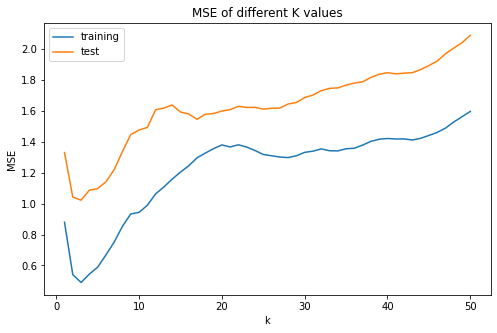

In [13]:
# Create a plot of the mse for different k values
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
sns.lineplot(x=k_values, y=mse_train, label="training", ax=ax)
sns.lineplot(x=k_values, y=mse_test, label="test", ax=ax)
ax.set_xlabel("k")
ax.set_ylabel("MSE")
ax.set_title("MSE of different K values")
ax.legend()

g)	Now, construct and fit a k-nearest neighbor model using the  KNeighborsRegressor() estimator in sklearn.neighbors module. Use the mean_square_error() function inside the sklearn.metrics module to compute the mse of the model on the test set. Is this similar to the mse value you got from the algorithm function you wrote from scratch? 

In [14]:
# Create and fit the KNN model
knn = KNeighborsRegressor(n_neighbors=5).fit(X_delivery_train, y_delivery_train)
# Precict on the test set
knn_test_preds = knn.predict(X_delivery_test)
# Calculate the mse for the test predictions
print("The MSE on the test set for the KNeighborsRegressor:", mean_squared_error(y_delivery_test, knn_test_preds))

The MSE on the test set for the KNeighborsRegressor: 1.1209346534653466


h)	Using the Pipeline constructor inside the sklearn.pipeline module, scale the X_delivery_train with the StandardScaler(), and also construct the KNeighborsRegressor() inside the Pipeline(). Then the call the fit() method on the pipeline object to fit the model into the delivery training data. Transform the X_delivery_test data using StandardScaler() and use the mean_squared_error () function inside the sklearn.metrics module to compute the mse of the model on the test set. Is this mse similar to the mse you got when you used the unscaled input data in (g) above?

In [15]:
# Create the pipeline object
pipe = Pipeline([("scale", StandardScaler()),
                 ("KNN", KNeighborsRegressor())])
# Fit the pipeline with the training data
pipe.fit(X_delivery_train, y_delivery_train)
# Predict on the test set (the pipeline scales the data internally)
pipe_preds = pipe.predict(X_delivery_test)
# Calculate the mse of the pipeline
print("The MSE of the Pipeline:", mean_squared_error(y_delivery_test, pipe_preds))

The MSE of the Pipeline: 1.0048316831683173


i)	Use the scaled X_delivery_train and X_delivery_test data and the RandomForestRegressor constructor inside the sklearn.ensemble module to construct/fit a random forest model, the compute the mse for this model. Is this mse similar to the one you got in question (h) above? 

In [16]:
# Scale the training and test set
X_train_scaled = StandardScaler().fit_transform(X_delivery_train)
X_test_scaled = StandardScaler().fit_transform(X_delivery_test)
# Fit a Random Forest to the scaled data
rf = RandomForestRegressor().fit(X_train_scaled, y_delivery_train)
# Predict on the test set
rf_preds = rf.predict(X_test_scaled)
# Calculate the MSE of the random forest
print("Random Forest MSE of the test set:", mean_squared_error(y_delivery_test, rf_preds))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Random Forest MSE of the test set: 1.0943102026516822


# Question 2

a.	You would use the student data for classification: that is, GPA and Age would be used as input to predict wither a student will drop out of school (Dropped=1) or not drop (Dropped=0). You will write a k-nearest neighbor algorithm function that learns from the training set and classifies given test instances to class 0 or class 1. The input that the function takes include:
*	X_train: Pandas DataFrame or 2D NumPy array 
*	 y_train: Pandas Series or 1D NumPy array 
*	X_test: Pandas DataFrame or 2D NumPy array
*	K: the number of nearest neighbors. The default value should be k=5 if no k value is passed during function call. 

Use the following pseudo code to implement the algorithm (also see class notes on ideas for writing knn from scratch to see the details of each step in the body of the code). Here is the pseudo code:

Scale the X_student_train and X_student_test data, and pass these scaled data sets in addition to y_student_train data into the knn_predict() function call to compute the predicted output values for the X_student_test set. You can reference the results using a variable, y_student_test_pred. 

In [17]:
def knn_predict(X_train, y_train, X_test, k=5):
    y_pred = []
    for i in range(0, len(X_test)):
        # Grad a data instance from the x_test data
        test_instance = np.array([X_test[i]])
        # Find the distance between the test instance and all the training instances
        dists = euclidean_distances(X_train, test_instance)
        # Stack the distances with the y_train to get a matrix
        stacked = np.stack((dists.flatten(), y_train["Dropped"].values), axis=1)
        # Sort the matrix by the distance column
        stacked = stacked[np.argsort(stacked[:, 0])]
        # Pick the first k y_train values.
        y_train_nearest_k = stacked[0:k, 1]
        # Make a perdiction from the y_train values. This is the most often occuring value within the k neighbors.
        label_counts = np.unique(y_train_nearest_k, return_counts=True)
        test_pred = label_counts[0][np.argmax(label_counts[1])]
        # Append the predicted value to the array
        y_pred.append(test_pred)
    # Return the list of predictions for the entire test set
    return(y_pred)

# Scale the training and test data
X_train_student_scaled = StandardScaler().fit_transform(X_student_train)
X_test_student_scaled = StandardScaler().fit_transform(X_student_test)
# Compute the predictions on the scaled test set
y_student_test_pred = knn_predict(X_train_student_scaled, y_student_train, X_test_student_scaled)
y_student_test_pred

[0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0]

b) Define a function called overall_accuracy, that computes the overall accuracy of your algorithm. You can let your function compare the actual values (y) and the predicted or classified y values (y_pred), for example: overall accuracy could be computed using mean(y==y_pred)

In [18]:
def overall_accuracy(y, y_pred):
    # Determine whether y matches y_pred
    is_equal = (y.to_numpy().flatten() == y_pred)
    # Calculate the proportion that where the same
    acc = np.mean(is_equal)
    return(acc)

overall_accuracy(y_student_test, y_student_test_pred)

0.72

c) Use GridSearch in scikit learn to tune the parameter of the k-nearest neighbor classifier, then use that optimal parameter to compute the accuracy of the knn estimator on the test set. Is this accuracy score similar to that obtained using your knn algorithm from scratch?

In [19]:
# Set gridsearch parameters
param_grid = {"n_neighbors": range(1, 51)}
# Use the gridsearch to find the optimal k value for a KNN classifier
grid = GridSearchCV(KNeighborsClassifier(), param_grid).fit(X_train_student_scaled, y_student_train.Dropped)
# Determine the best k value
print("The best k-value from the gridsearch:", grid.best_params_)

The best k-value from the gridsearch: {'n_neighbors': 19}


In [22]:
# Use the best model to predict on the test set
grid_preds = grid.best_estimator_.predict(X_test_student_scaled)
# Calcaulte the accuracy of the best model
print("Accuracy of best model from GridSearch:", overall_accuracy(y_student_test, grid_preds))

Accuracy of best model from GridSearch: 0.72


d) Also build another model using a random forest classifier and compute the accuracy score on the test set. Which of these models is the better, the model is question 2c or this model in question 2d? Why or why not?

In [24]:
# Use a random forest classifier
rf_clf = RandomForestClassifier().fit(X_train_student_scaled, y_student_train.Dropped)
# Determine the accuracy of the Random Forest classifier
rf_preds = rf_clf.predict(X_test_student_scaled)
print("Accurcy of Random Forest Classifier:", overall_accuracy(y_student_test, rf_preds))

Accurcy of Random Forest Classifier: 0.67


# Question 3

Find your own dataset suitable for classification or regression with at least three input variables and 200 or more cases: Depending on the target variable of interest, you would build a k-nearest neighbor classifier or regressor using the appropriate sklearn estimator. Find some interesting unique dataset that is not popularly used in the internet. 
Address the following and include code/output snippets from b) to f). Include the response under each sub question. 


In [74]:
# Read in the abalone dataset
df_abalone = pd.read_csv("abalone.csv", header=None)
# Rename the columns to their actual values
df_abalone.columns = ["sex", "length", "diameter", "height", "weight_whole", \
                      "weight_shucked", "weight_viscera", "weight_shell", "rings"]

# Extract the response variable
y_aba = df_abalone["rings"]

# Standardize the numerical data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_abalone.drop(["sex", "rings"], axis=1))
df_scaled = pd.DataFrame(data_scaled, columns=["length", "diameter", "height", "weight_whole", \
                                   "weight_shucked", "weight_viscera", "weight_shell"])
# Convert gender to categorical
df_dummy = pd.get_dummies(df_abalone["sex"], drop_first=True)

# Combine the cleaned dataframes into an X dataframe
df_aba = pd.concat([df_scaled, df_dummy], axis=1)
df_aba.head()

,length,diameter,height,weight_whole,weight_shucked,weight_viscera,weight_shell,I,M
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0,1
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0,1
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0,0
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0,1
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,1,0


In [75]:
# Search for missing data
np.sum(df_aba.isna())

length            0
diameter          0
height            0
weight_whole      0
weight_shucked    0
weight_viscera    0
weight_shell      0
I                 0
M                 0
dtype: int64

In [78]:
# Split the data into training and test sets
X_train_aba, X_test_aba, y_train_aba, y_test_aba = train_test_split(df_aba, y_aba,
                                                                    test_size=0.2,
                                                                    random_state=42)
print(X_train_aba.shape)
print(y_train_aba.shape)
print(X_test_aba.shape)
print(y_test_aba.shape)

(3341, 9)
(3341,)
(836, 9)
(836,)


In [82]:
# Create a KNN regressor and fit it to the training data
knn_aba = KNeighborsRegressor()

In [83]:
# Use GridSearch to find the best k-value for the model
param_grid = {"n_neighbors": np.arange(1, 21)}
grid_aba = GridSearchCV(knn_aba, param_grid, cv=8)
# Fit the GridSearch to the training data
grid_aba.fit(X_train_aba, y_train_aba)
# Set the model as the best model
knn_aba = grid_aba.best_estimator_
print("Best k-value from training data:", grid_aba.best_params_)

Best k-value from training data: {'n_neighbors': 16}


In [84]:
# Using the best model, predict the values of the training and test sets
aba_preds_train = knn_aba.predict(X_train_aba)
aba_preds_test = knn_aba.predict(X_test_aba)
# Compute the MSE of the predictions on both sets
print("MSE on the training set:", mse(y_train_aba, aba_preds_train))
print("MSE on the test set:", mse(y_test_aba, aba_preds_test))

MSE on the training set: 4.251068635887459
MSE on the test set: 4.932355524820574
